In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import pandas as pd

# Specify the correct encoding for the file
df = pd.read_csv(r'C:\Users\HP\Documents\datascience\codesoft\IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
#data cleaning
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df.shape


(15509, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
df.duplicated().sum()

6

In [13]:
df.dropna(inplace=True)

In [15]:
df.shape

(5659, 10)

In [17]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [19]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(5659, 10)

In [23]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [25]:
#data pre-processing
df['Year']=df['Year'].str.replace(r'[()]', '',regex=True).astype(int)

In [27]:
df['Duration']=pd.to_numeric(df['Duration'].str.replace(' min', ''))

In [29]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [31]:
print(df['Genre'].isna().sum())

0


In [33]:
# Ensure that all values in 'Genre' are strings before splitting
df['Genre'] = df['Genre'].astype(str).str.split(', ')

# Explode the 'Genre' column to create one row per genre
df = df.explode('Genre')

# Replace 'nan' (from NaN values) with actual NaN
#df['Genre'].replace('nan', pd.NA, inplace=True)

# Check if the mode returns a value before attempting to fill NaN values
if not df['Genre'].mode().empty:
    most_frequent_genre = df['Genre'].mode()[0]  # Get the most frequent genre
    df['Genre'] = df['Genre'].fillna(most_frequent_genre)
else:
    print("No mode found for the 'Genre' column.")


In [35]:
df['Votes']=pd.to_numeric(df['Votes'].str.replace(',',''))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


In [39]:
#data visualization
year=px.histogram(df,x='Year',histnorm='probability density',nbins=30)

In [3]:
import pandas as pd
import plotly.express as px

# Load your dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv(r'C:\Users\HP\Documents\datascience\codesoft\IMDb Movies India.csv', encoding='ISO-8859-1')

# Now proceed with the rest of your code
# Calculate average rating by year and genre
average_rating_by_year = df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get top 10 genres based on frequency
top_genres = df['Genre'].value_counts().head(10).index

# Filter average_rating_by_year for top genres
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_genres)]

# Create the plot
fig = px.line(average_rating_by_year, x='Year', y='Rating', color='Genre')

# Update layout
fig.update_layout(
    title='Average Rating by Year for Top Genres',
    xaxis_title='Year',
    yaxis_title='Average Rating'
)

# Show the plot
fig.show()


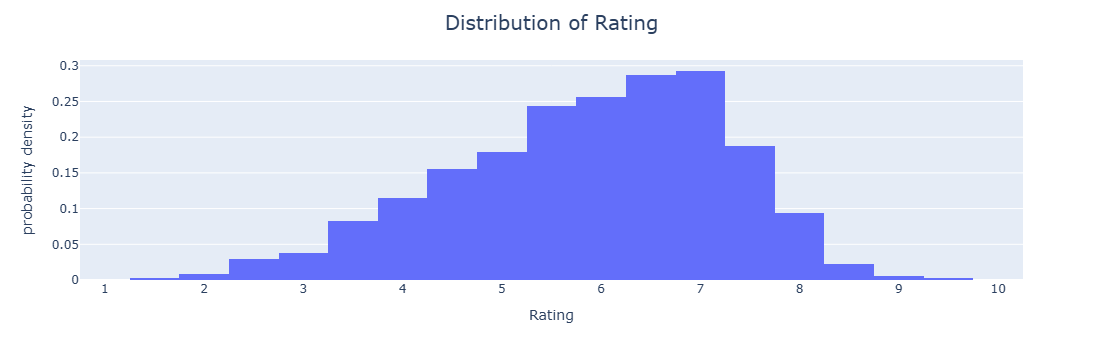

In [45]:
rating_fig=px.histogram(df,x='Rating',histnorm='probability density',nbins=40)
rating_fig.update_layout(title='Distribution of Rating',title_x=0.5,title_pad=dict(t=20),title_font=dict(size=20),xaxis_title='Rating',yaxis_title='probability density')
rating_fig.show()

In [47]:
#feature engineering
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [49]:
df.drop('Name', axis=1,inplace=True)

In [51]:
genre_mean_rating=df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating']=genre_mean_rating
director_mean_rating=df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded']=director_mean_rating
actor1_mean_rating=df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded']=actor1_mean_rating
actor2_mean_rating=df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded']=actor2_mean_rating
actor3_mean_rating=df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded']=actor3_mean_rating

In [53]:
x=df[['Year','Votes','Duration','Genre_mean_rating','Director_encoded','Actor1_encoded','Actor2_encoded','Actor3_encoded']]
y=df['Rating']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
#model Building
Model=LinearRegression()
Model.fit(x_train,y_train)
Model_pred=Model.predict(x_test)

In [59]:
print('The performance evaluation of Logistic Regression is below:','\n')
print('Mean squared error: ',mean_squared_error(y_test,Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,Model_pred))
print('R2 score: ',r2_score(y_test,Model_pred))

The performance evaluation of Logistic Regression is below: 

Mean squared error:  0.4465441653985703
Mean absolute error:  0.4921902540765641
R2 score:  0.7641133663863862


In [61]:
#model testing
x.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [63]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [65]:
data={'Year':[2019],'Votes':[36],'Duration':[111],'Genre_mean_rating':[4.5],'Director_encoded':[4.5],'Actor1_encoded':[5.3],'Actor2_encoded':[4.5],'Actor3_encoded':[4.5]}
trail=pd.DataFrame(data)

In [67]:
rating_predicted=Model.predict(trail)
print("Predicted Rating:",rating_predicted[0])

Predicted Rating: 4.1655489884717705
